# <span style="color:darkblue"> QTM 530 Homework 2 </span>

Linchuan Zhang

9/18/2024

Late-submission Version

# <span style="color:darkblue"> Import Libraries and Raw Data </span>

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

results_raw = pd.read_csv("data_raw/results.csv")
races_raw    = pd.read_csv("data_raw/races.csv")
circuits_raw = pd.read_csv("data_raw/circuits.csv")
constructors_raw = pd.read_csv("data_raw/constructors.csv")

# <span style="color:darkblue"> Question (a) </span>

In [119]:
# Step 1: Get the names of constructors by merging on the "constructorId" variable; get the year of each race by merging on the "raceId" variable
results_with_name=pd.merge(results_raw,
                       constructors_raw[['constructorId', 'name']],
                       on = "constructorId",
                       how = "left")

results_with_name_year = pd.merge(results_with_name,
                       races_raw[['raceId', 'year']],
                       on = "raceId",
                       how = "left")

# Step 2.1: Quality check: count sample size of merged datasets
display(len(results_raw))
display(len(results_with_name))
display(len(results_with_name_year))

25840

25840

25840

As shown above, the total number of rows remains the same after merging with the "constructor_raw" and "race_raw" datasets, indicating that no rows from the "results_raw" data were lost during the merging process.

In [132]:
# Step 2.2: Quality check: variable types
results_with_name_year.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
name                object
year                 int64
dtype: object

In [133]:
# Step 3: Subset the dataset, only include results between 1981 and 2020
results_1981_2020 = results_with_name_year.query("(year >= 1981) and (year <= 2020)")

# Step 4: Get the total number of points for each constructor 
total_points_1981_2020 = results_1981_2020.groupby('name')['points'].sum()

# Step 5: Calculate the average points, and then calculate the difference between each contractor's total points and the average total points
total_points_1981_2020 = pd.DataFrame(total_points_1981_2020).reset_index()
mean_total_points = total_points_1981_2020['points'].mean()
total_points_1981_2020.loc[:, 'average total points'] = mean_total_points
total_points_1981_2020.loc[:, 'points difference'] = total_points_1981_2020['points'] - total_points_1981_2020['average total points']

# Step 6: Identify and display three constructors had the highest number of total points
total_points_1981_2020_sorted=total_points_1981_2020.sort_values(by="points",ascending = False)
total_points_1981_2020_3=total_points_1981_2020_sorted.iloc[0:3,:]
display(total_points_1981_2020_3)

,name,points,average total points,points difference
16,Ferrari,7374.0,532.238806,6841.761194
40,Mercedes,5685.0,532.238806,5152.761194
39,McLaren,5229.5,532.238806,4697.261194


Ferrari, Mercedes, and McLaren had the highest total points between 1981 and 2020. Ferrari got 7373 points, Mercedes got 5685 points, and McLaren got 5229 points. Given that the average points across all constructors is approximately 532.24, these three constructors outperformed the average by 6841, 5152, and 4697 points respectively, as shown in the "points difference" column above.


# <span style="color:darkblue"> Question (b) </span>

In [134]:
# Step 1: Subset the results between the years 2001 and 2020 from the data I compiled and checked for the years 1981 to 2020 in Question (a).
results_2001_2020 = results_with_name_year.query("(year >= 2001) and (year <= 2020)")

# Step 2: Get the total number of points for each constructor 
total_points_2001_2020 = results_2001_2020.groupby('name')['points'].sum()

# Step 3: Calculate the average points, and then calculate the difference between each contractor's total points and the average total points
total_points_2001_2020 = pd.DataFrame(total_points_2001_2020).reset_index()
mean_total_points_2 = total_points_2001_2020['points'].mean()
total_points_2001_2020.loc[:, 'average total points'] = mean_total_points_2
total_points_2001_2020.loc[:, 'points difference'] = total_points_2001_2020['points'] - total_points_2001_2020['average total points']

# Step 4: Identify and display three constructors had the highest number of total points
total_points_2001_2020_sorted=total_points_2001_2020.sort_values(by="points",ascending = False)
total_points_2001_2020_3=total_points_2001_2020_sorted.iloc[0:3,:]
display(total_points_2001_2020_3)

,name,points,average total points,points difference
8,Ferrari,5862.0,786.014286,5075.985714
21,Mercedes,5685.0,786.014286,4898.985714
25,Red Bull,5043.5,786.014286,4257.485714


Ferrari, Mercedes, and Red Bull had the highest total points between 2001 and 2020. Ferrari got 5862 points, Mercedes got 5685 points, and McLaren got 5043 points. Given that the average points across all constructors is approximately 786.01, these three constructors outperformed the average by 5075, 4898, and 4257 points respectively, as shown in the "points difference" column above.

# <span style="color:darkblue"> Question (c) </span>

In [135]:
# Note: the two time periods I compare is 1981-2000 and 2001-2020.

# Step 1: Subset the dataset, only include results between 1981 and 2000, then calculate total points across constuctors, as I did for Question (b)
results_1981_2000 = results_with_name_year.query("(year >= 1981) and (year <= 2000)")
total_points_1981_2000 = results_1981_2000.groupby('name')['points'].sum()
total_points_1981_2000 = pd.DataFrame(total_points_1981_2000).reset_index()
total_points_1981_2000_sorted=total_points_1981_2000.sort_values(by="points",ascending = False)
# delete the "mean points" variables generated for answer question (b) 
total_points_2001_2020_sorted_2 = total_points_2001_2020_sorted.drop(['average total points', 'points difference'], axis=1)

# Step 2: Calculate the rank of each contructor across years
total_points_1981_2000_sorted['Points Rank'] = range(1, len(total_points_1981_2000_sorted) + 1)
total_points_2001_2020_sorted_2['Points Rank'] = range(1, len(total_points_2001_2020_sorted_2) + 1)

# Step 3: Rename the variables for merging purpose. 
data1=total_points_1981_2000_sorted.rename(columns={'points': 'Points(1981-2000)', 'Points Rank': 'Points Rank(1981-2000)'})
data2=total_points_2001_2020_sorted_2.rename(columns={'points': 'Points(2001-2020)', 'Points Rank': 'Points Rank(2001-2020)'})

# Step 4: Merging the rank of constructors between two different time periods into a single dataset.
rank_comparison = pd.merge(data1,data2,on = "name",how = "left")

# Step 5 (Important): Check missing values of the two "points" variable in the new dataset; Only include constructors which exist in both time periods for further comparisons.
missing_values_2001_2020 = rank_comparison['Points(2001-2020)'].isnull().sum()
display(missing_values_2001_2020)

rank_comparison_deleteNA = rank_comparison.dropna(subset= 'Points(2001-2020)')


32

As shown above, for all teams that existed in the period 1981-2000, 32 teams have missing values for Points in the period 2001-2020, indicating that they no longer existed in the latter time period. Since we are comparing teams' performance across both time periods, we will focus only on teams that operated in both time periods. Therefore, we will drop these 32 teams from further analysis.

In [136]:
# Step 6: Calculate the rank change across two time periods
rank_comparison_deleteNA = rank_comparison_deleteNA.copy()  # Make a copy to avoid the warning (solution found on the internet)
rank_comparison_deleteNA['Points Rank Change'] = rank_comparison_deleteNA['Points Rank(1981-2000)'] - rank_comparison_deleteNA['Points Rank(2001-2020)']

rank_comparison_deleteNA_sorted=rank_comparison_deleteNA.sort_values(by="Points Rank Change",ascending = False)
display(rank_comparison_deleteNA_sorted)

,name,Points(1981-2000),Points Rank(1981-2000),Points(2001-2020),Points Rank(2001-2020),Points Rank Change
29,Jaguar,4.0,30,45.0,21.0,9.0
20,BAR,20.0,21,207.0,14.0,7.0
2,Ferrari,1512.0,3,5862.0,1.0,2.0
11,Sauber,90.0,12,467.0,10.0,2.0
6,Renault,245.0,7,1465.0,6.0,1.0
0,McLaren,1945.5,1,3284.0,4.0,-3.0
1,Williams,1819.5,2,1535.5,5.0,-3.0
13,Alfa Romeo,46.0,14,65.0,19.0,-5.0
16,Minardi,28.0,17,10.0,22.0,-5.0
14,Prost,31.0,15,4.0,24.0,-9.0


The table above shows the rank changes of teams across two time periods. A positive "Points Rank Change" indicates that a team's rank is higher in 2001-2020 compared to 1981-2000, and vice versa. For example, Ferrari's rank improved from the third to the first (Points Rank Change = 2). The figure below visualizes the rank changes for each team that existed in both time periods.

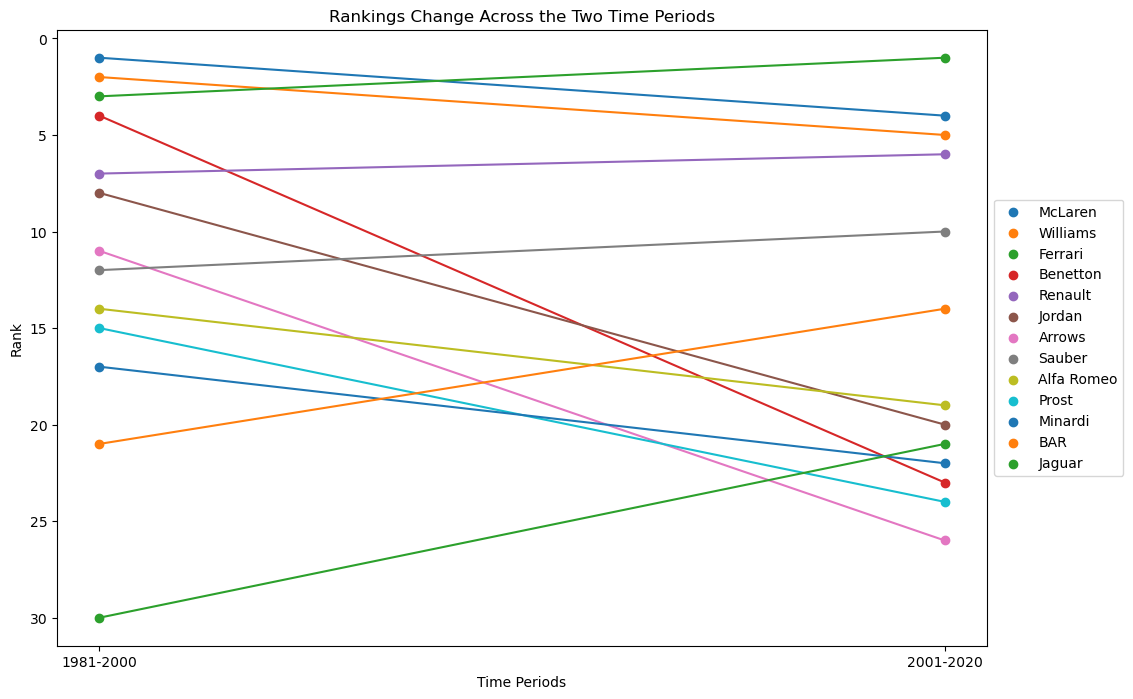

In [137]:
# Step 7 Visualization
plt.figure(figsize=(12, 8))

# Plot points and lines for each team's rankings across two time periods
for i, team in enumerate(rank_comparison_deleteNA['name']):
    plt.scatter([1, 2], [rank_comparison_deleteNA['Points Rank(1981-2000)'].iloc[i], rank_comparison_deleteNA['Points Rank(2001-2020)'].iloc[i]], label=f'{team}')
    plt.plot([1, 2], [rank_comparison_deleteNA['Points Rank(1981-2000)'].iloc[i], rank_comparison_deleteNA['Points Rank(2001-2020)'].iloc[i]])

plt.xticks([1, 2], ['1981-2000', '2001-2020'])
plt.xlabel('Time Periods')
plt.ylabel('Rank')
plt.gca().invert_yaxis() #reverse the y-axis
plt.title('Rankings Change Across the Two Time Periods')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# <span style="color:darkblue"> Question (d) </span>

In [138]:
# Step 1: Subset a new dataset containing only the results of Ferrari from the dataset compiled in Question (a).
results_F = results_1981_2020.query('name == "Ferrari"')

# Step 2: Calculate the number of unique driver IDs in the dataset I got from Step 1.
unique_driver=pd.unique(results_F["driverId"])
len(unique_driver)

25

As shown above, Ferrari had 25 different drivers between 1981 and 2020.

# <span style="color:darkblue"> Question (e) </span>

In [141]:
# Step 1: Calculate the total points Ferrari got for each year.
results_F_eachyearpoint= results_F.groupby('year')['points'].sum()

# Step 2: rank the years by total points from highest to lowest.
results_F_eachyearpoint= pd.DataFrame(results_F_eachyearpoint)
results_F_eachyearpoint_sorted = results_F_eachyearpoint.sort_values(by="points",ascending = False)

# Step 3: Display the five years with the highest points.
results_F_eachyearpoint_sorted_1=results_F_eachyearpoint_sorted.iloc[0:5,:]
display(results_F_eachyearpoint_sorted_1)


,points
year,
2018,571.0
2017,522.0
2019,504.0
2015,428.0
2012,400.0


As shown above, 2018 was Ferrari's best year, because Ferrari got the highest points that year. 